# Datalab II <a name='jump'></a>

    Groepsnummer: 2B
    Coach: Marjolijn de Jager
    Namen groepsleden: 
        - Yara Passchier, 22080600
        - Jesse Van Leeuwen, 22096337
        - (Alyssa Leliveld, 22111026)
        - (Bart Jeninga, 22079793)
        - Nieyam Kanhai 22108920

# Table of contents

1. [Importeren van de data](#import)
1. [Sprint 2](#sprint2)
    1. [Beschrijving tabellen](#beschrijftabellen)
        1. [Bepaling gevens van onze club](#gegevensclub)
        2. [Maken functie om gegevens te verzamelen](#functiebepaling)
            1. [Opstellen ranglijst van een seizoen](#ranglijst)
2. [Sprint 3](#sprint3)
    1. [Bepaal met behulp van SQL:](#SQL)
        1. [Toon het aantal wedstrijden dat jouw team heeft gespeeld per seizoen.](#wedstrijdenperseizoen)
        2. [Toon het aantal wedstrijden van jouw team in het kalenderjaar 2010 per seizoen.](#wedstrijden2010)
        3. [Toon hoeveel punten ieder team in jouw competitie gehaald heeft per seizoen.](#puntencompetitie)
        4. [Toon op welke plaats jouw team daarmee is geëindigd in de ranglijst.](#teamranglijst)
    2. [Bepalen invloed teameigenschappen.](#teaminfluence)
        1. [Het mergen van het aantal punten per team en de teameigenschappen.](#dataframeteameigenschappen)
        2. [Bepalen correlatie teameigenschappen en behaalde punten.](#correlatie)
        3. [Visueel maken bevindingen.](#visualisatie)
3. [Sprint 4](#sprint4)
    1. [Numerieke gemiddelde spelers.](#gemiddeldspeler)
    2. [Toevoegen overall rating in dataframe match.](#overallrating)
    3. [Visualisatie overall rating speler van een seizoen.](#visueeloverallseizoen)
    4. [Visualisatie punten per wedstrijd per team.](#visueelpuntenwedstrijd)
    5. [Visualisatie vergelijking overall rating & punten per team.](#overallratingpuntenteam)
    6. [Toepassen functie op andere rating.](#definitieandererating)
4. [Sprint 5](#sprint5)
    1. [Welke vorm supervised learning?](#vorm)
    2. [Resultaat toevoegen aan Match](#resultaat)
    3. [Features](#features)
    4. [Nieuwe dataframe op basis van features](#newdataframe)
    5. [Algoritmes](#algoritme)
    6. [Evaluatie](#evaluatie)
    7. [Ethische data regelgeving/legaliteit](#ethisch)
5. [Sprint 6](#sprint6)
    1. [Bookmaker odds naar kansen](#bookmaker)
    2. [Voorspelde resultaat Bookmaker](#result)
    3. [Vergelijken Bookmaker met eigen resultaat](#vergelijken)
    4. [Evaluatie eigen model bij gokken](#modelgebruik)

## Importeren van de dataset <a name = 'import'></a>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sqlite3
import warnings
warnings.filterwarnings('ignore')
con = sqlite3.connect("database.sqlite")
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

def show_query(query):
    """
       Deze functie print de output van je SQL query uit.
       Parameters:
                  query = Je SQL query.
                          Zorg ervoor dat deze parameter een string is.
    """
    query_output = pd.read_sql_query(query, con)
    return pd.DataFrame(query_output)


[Terug naar het begin](#jump)

# Sprint 2 <a name="sprint2"></a>

In [3]:
# Load the data into a DataFrame
df_country = show_query("SELECT * FROM Country")
df_league = show_query("SELECT * FROM League")
df_match = show_query("SELECT * FROM Match")
df_player = show_query("SELECT * FROM Player")
df_player_attributes = show_query("SELECT * FROM Player_Attributes")
df_team = show_query("SELECT * FROM Team")
df_team_attributes = show_query("SELECT * FROM Team_Attributes")

# Beschrijving tabellen <a name="beschrijftabellen"></a>
Er zijn 7 tabellen:

- country: een tabel met landen. In deze tabel staan alle landen die mee doen met de voetbalwedstrijden.

- league: tabel met de leagues. Deze tabel bevat de data van welke competities er worden gespeeld.

- match: tabel van verschillende wedstrijden. De tabel match bevat informatie over de wedstrijden.

- player: tabel van alle spelers. In deze tabel kan alle informatie over spelers worden gevonden.

- player_attributes: tabel met de eigenschappen van de spelers. De tabel player_attributes bevat informatie over de kwaliteiten en eigenschappen van de spelers.

- team: tabel van de teams. In deze tabel staat alle informatie over de verschillende teams.

- team_attributes: tabel met de eigenschappen van de teams. In deze tabel staat alle informatie van de verschillende teams.

- team_attributes: tabel met de eigenschappen van de teams. En als laatste in deze tabel staan alle kwaliteiten en eigenschappen van de teams.

## 1. Bepaal de volgende gegevens van jouw club: <a name="gegevensclub"></a>
- team naam
- team id
- competitie id
- competitie naam
- De gegevens van alle wedstrijden die jouw club heeft gespeeld.

De eerste stap is het achterhalen van ons team id, SC Heerenveen.

In [4]:
#bepaal team naam, team id, competitie id, competitie naam van SC Heerenveen
query = """

SELECT *

    FROM team

    WHERE team_long_name = 'SC Heerenveen'

"""

show_query(query)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,26562,10228,1913,SC Heerenveen,HEE


Dit team_api_id gebruiken wij vervolgens alle informatie per wedstrijd thuis en uit gespeeld op te halen.

In [5]:
#Bepaal gegevens alle wedstrijden SC Heerenveen
query = """

SELECT *

    FROM match 

    WHERE home_team_api_id = 10228
    OR away_team_api_id = 10228

"""

show_query(query)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,13281,13274,13274,2008/2009,1,2008-08-31 00:00:00,508309,6601,10228,2,3,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5044.0,104005.0,NaN,45893.0,101042.0,26657.0,26716.0,NaN,99306.0,NaN,5687.0,26483.0,104482.0,26476.0,26473.0,110138.0,40290.0,42527.0,30477.0,39379.0,36018.0,27866.0,None,None,None,None,None,None,None,None,4.20,3.40,1.80,3.70,3.35,1.85,3.00,3.3,2.0,3.60,3.30,1.83,NaN,NaN,NaN,3.60,3.40,1.80,4.75,3.5,1.73,3.75,3.40,1.80,4.00,3.4,1.83,3.80,3.40,1.80
1,13291,13274,13274,2008/2009,10,2008-11-09 00:00:00,523739,10217,10228,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,3.80,3.60,1.91,3.50,3.35,1.95,3.10,3.2,2.0,3.20,3.20,2.00,NaN,NaN,NaN,3.60,3.40,1.80,4.00,3.6,1.83,3.75,3.25,1.85,3.75,3.4,1.90,3.80,3.40,1.83
2,13294,13274,13274,2008/2009,11,2008-11-15 00:00:00,523742,10228,9908,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.50,3.75,5.50,1.60,3.65,5.00,1.65,3.3,4.4,1.67,3.40,4.33,NaN,NaN,NaN,1.55,3.60,5.00,1.50,4.0,6.00,1.55,3.60,5.00,1.60,3.6,5.00,1.57,3.60,5.50
3,13303,13274,13274,2008/2009,12,2008-11-22 00:00:00,523751,8611,10228,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.00,3.30,3.40,2.00,3.35,3.30,2.00,3.2,3.1,1.91,3.25,3.40,NaN,NaN,NaN,2.00,3.25,3.40,2.00,3.4,3.60,2.00,3.40,3.25,2.00,3.3,3.40,2.10,3.25,3.20
4,13314,13274,13274,2008/2009,13,2008-11-29 00:00:00,523762,10228,8640,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.62,3.20,2.50,2.60,3.25,2.45,2.50,3.2,2.3,2.60,3.20,2.38,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.4,2.38,2.50,3.40,2.40,2.60,3.3,2.50,2.60,3.30,2.40
...,...,...,...,...,...,..

[Terug naar het begin](#jump)

## 2. Maak een functie waarmee je per seizoen voor een gekozen club o.a. het volgende kunt bepalen: <a name="functiebepaling"></a>

- Aantal wedstrijden in dat seizoen.
- Aantal punten behaald in dat seizoen.
- Gemiddeld aantal punten per wedstrijd.
- Winst-, verlies- en gelijk percentage in uitwedstrijden en thuiswedstrijden.

Hier wordt de functie gemaakt om met 3 parameters direct alle gevraagde informatie terug te krijgen. In de docstring van de functie is te lezen hoe de functie werkt, welke parameters er gebruikt worden en wat er uit de functie komt.

In [6]:
def matchinfo(team_id, season, league_id):
  
    """Bereken de wedstrijdresultaten van een gekozen team voor een gekozen seizoen.
    Parameters:
    -----------
    team_id : int
        Het ID-nummer van het team die je als parameter invult en de resultaten voor worden berekend.
    season : str
        Het seizoen die je als parameter invult waarvan de resultaten worden berekend.
    league_id: int
        Het ID-nummer van de competitie waarin de club speelt en op gefilterd moet worden.
  
    Returns:
    -----------
    pandas.DataFrame
        Een Pandas DataFrame met de wedstrijdresultaten van het team en het seizoen dat je hebt opgegeven bij de parameters. dit zijn de kolommen die het dataframe bevat:
        - totaal_games: het totale aantal van gespeelde wedstrijden in het gekozen seizoen
        - total_points: het totale aantal gehaalde punten in het gekozen seizoen
        - season: seizoen waar de rest van de informatie over gaat
        - team_id: het ID-nummer van het gekozen team
        - average_points: het gemiddelde aantal punten
        - perc_win_home: percentage van de gewonnen thuis wedstrijden
        - perc_draw_home: percentage van gelijk gespeelde thuis wedstrijden
        - perc_loss_home: percentage van de verloren thuis wedstrijden
        - perc_win_away: percentage van de gewonnen uit wedstrijden
        - perc_draw_away: percentage van gelijk gespeelde uit wedstrijden
        - perc_loss_away:  percentage van de verloren thuis wedstrijden
      
    """
    #finding team in home match
    home_match_results = []
    home_team_points = []
    home_df = df_match[(df_match['home_team_api_id'] == team_id) & (df_match['season'] == season) & (df_match['league_id'] == league_id)]
    for index,row in home_df.iterrows():
        if row['home_team_goal'] > row['away_team_goal']:
            home_match_results.append('win')
            home_team_points.append(3)
        elif row['home_team_goal'] == row['away_team_goal']:
            home_match_results.append('draw')
            home_team_points.append(1)
        else:
            home_match_results.append('loss')
            home_team_points.append(0)
 
 
    home_df['match_results'] = home_match_results
    home_df['team_points'] = home_team_points
 
    #finding team in away match
    away_match_results = []
    away_team_points = []
    away_df = df_match[(df_match['away_team_api_id'] == team_id) & (df_match['season'] == season) & (df_match['league_id'] == league_id)]
    for index,row in away_df.iterrows():
        if row['away_team_goal'] > row['home_team_goal']:
            away_match_results.append('win')
            away_team_points.append(3)
        elif row['away_team_goal'] == row['home_team_goal']:
            away_match_results.append('draw')
            away_team_points.append(1)
        else:
            away_match_results.append('loss')
            away_team_points.append(0)
 
    away_df['match_results'] = away_match_results
    away_df['team_points'] = away_team_points
 
    #sum of matches
    home_points = home_df['team_points'].sum()
    away_points = away_df['team_points'].sum()
  
    total_points = home_points + away_points
    total_match = len(home_df) + len(away_df)
    average_points = total_points / total_match
  
    #the percentages for home
    total_match_home = len(home_df)
    if total_match_home > 0:
        perc_win_home = len(home_df[home_df['team_points'] == 3]) / total_match_home * 100
        perc_draw_home = len(home_df[home_df['team_points'] == 1]) / total_match_home * 100
        perc_loss_home = len(home_df[home_df['team_points'] == 0]) / total_match_home * 100
    else:
        perc_win_home = 0
        perc_draw_home = 0
        perc_loss_home = 0
  
    #percentages for away
    total_match_away = len(away_df)
    if total_match_away > 0:
        perc_win_away = len(away_df[away_df['team_points'] == 3]) / total_match_away * 100
        perc_draw_away = len(away_df[away_df['team_points'] == 1]) / total_match_away * 100
        perc_loss_away = len(away_df[away_df['team_points'] == 0]) / total_match_away * 100
    else:
        perc_win_away = 0
        perc_draw_away = 0
        perc_loss_away = 0
  
    #creating the dataframe
    df = pd.DataFrame()
    df['season'] = [season]
    df['team_id'] = team_id
    df['league_id'] = league_id
    df['total_games'] = total_match
    df['total_points'] = total_points
    df['average_points'] = average_points
    df['perc_win_home'] = perc_win_home
    df['perc_draw_home'] = perc_draw_home
    df['perc_loss_home'] = perc_loss_home
    df['perc_win_away'] = perc_win_away
    df['perc_draw_away'] = perc_draw_away
    df['perc_loss_away'] = perc_loss_away
  
    return df

### Pas deze functie toe op een seizoen naar keuze en bepaal de ranglijst van dat seizoen. <a name="ranglijst"></a>

Vervolgens gebruiken wij deze functie om het toe te passen in een loop voor elk team, dit geeft ons een dataframe met de informatie van alle teams en hebben deze gerankschikt.

In [7]:
# Toepassing ranglijst op alle teams voor seizoen 2008/2009

team_list = list(df_match['home_team_api_id'].unique())

df_season = pd.DataFrame()
for team in team_list:
    team_season_results = matchinfo (team, '2008/2009', 13274)
    df_season = pd.concat([df_season,team_season_results])

ranglijst = df_season.sort_values(by = ['total_points'], ascending = False)

In [8]:
ranglijst = ranglijst.dropna().reset_index().set_index('team_id')
del ranglijst['index']
display(ranglijst)

,season,league_id,total_games,total_points,average_points,perc_win_home,perc_draw_home,perc_loss_home,perc_win_away,perc_draw_away,perc_loss_away
team_id,,,,,,,,,,,
10229,2008/2009,13274,34,80.0,2.352941,82.352941,5.882353,11.764706,64.705882,23.529412,11.764706
8611,2008/2009,13274,34,69.0,2.029412,70.588235,23.529412,5.882353,47.058824,29.411765,23.529412
8593,2008/2009,13274,34,68.0,2.000000,76.470588,17.647059,5.882353,47.058824,11.764706,41.176471
8640,2008/2009,13274,34,65.0,1.911765,64.705882,23.529412,11.764706,47.058824,23.529412,29.411765
10228,2008/2009,13274,34,60.0,1.764706,64.705882,29.411765,5.882353,35.294118,23.529412,41.176471
8674,2008/2009,13274,34,56.0,1.647059,64.705882,5.882353,29.411765,35.294118,23.529412,41.176471
9761,2008/2009,13274,34,45.0,1.323529,41.176471,17.647059,41.176471,35.294118,17.647059,47.058824
10235,2008/2009,13274,34,45.0,1.323529,47.058824,29.411765,23.529412,23.529412,23.529412,52.941176
9908,2008/2009,13274,34,44.0,1.294118,47.058824,23.529412,29.411765,17.647059,41.176471,41.176471


[Terug naar het begin](#jump)

# Sprint 3 <a name="sprint3"></a>

## 1. Bepaal met behulp van SQL in deze sprint het volgende:  <a name="SQL"></a>

- Toon het aantal wedstrijden dat jouw team heeft gespeeld per seizoen.
- Toon het aantal wedstrijden van jouw team in het kalenderjaar 2010 per seizoen.
- Toon hoeveel punten ieder team in jouw competitie gehaald heeft per seizoen.
- Toon op welke plaats jouw team daarmee is geëindigd in de ranglijst.

### Toon het aantal wedstrijden dat jouw team heeft gespeeld per seizoen. <a name="wedstrijdenperseizoen"></a>

hier bekijken we hoeveel wedstrijden ons gekozen team in totaal heeft gespeeld in elk seizoen

In [9]:
#Aantal wedstrijden HC Heerenveen per seizoen.
def wedstrijden(team):
    """ telt het aantal wedstrijden van het gekozen team in de parameter per seizoen
    parameters:
    -----------
    team: int
    de ID van het team waarvan het totaal aantal wedstrijden wordt geteld per seizoen
    
    returns:
    -----------
    pandas.DataFrame
    Een pandas DataFrame waarin je het totaal aantal gespeelde wedstrijden kan zien van het gekozen team in de parameter per seizoen.
    Dat laat de volgende kolommen zien:
    -season: het seizoen waarvan het aantal wedstrijden wordt geteld.
    -aantal_wedstrijden: het aantal wedstrijden gespeeld door het team dat is gekozen in de parameter per seizoen.
    
    """
    query = f"""
    SELECT season 
         , COUNT(match_api_id) AS aantal_wedstrijden
    FROM Match
    WHERE home_team_api_id = {team}
          OR away_team_api_id = {team}
    GROUP BY season;
    """
    return(show_query(query))

wedstrijden(10228)

,season,aantal_wedstrijden
0,2008/2009,34
1,2009/2010,34
2,2010/2011,34
3,2011/2012,34
4,2012/2013,34
5,2013/2014,34
6,2014/2015,34
7,2015/2016,34


### Toon het aantal wedstrijden van jouw team in het kalenderjaar 2010 per seizoen. <a name="wedstrijden2010"></a>

vervolgens bekijken we hier hoeveel wedstrijden ons team in totaal heeft gespeeld per seizoen in het jaar 2010

In [10]:
#Aantal wedstrijden 2010 per seizoen HC Heerenveen
def seizoenwedstrijd(team):
    """ telt het aantal wedstrijden dat een bepaald team heeft gespeeld( in dit geval SC Heerenveen) in een bepaald jaar(in dit geval in het jaar 2010). 
    parameters:
    -----------
    team: int
    de ID van het team waarvan het totaal aantal wedstrijden word berekend
            
    returns:
    -----------
    pandas.DataFrame
    een pandas DataFrame waarin je het totaal aantal gespeelde wedstrijden, zowel de uit als thuiswedstrijden ziet van het team waarvan je het team_ID invoert in de parameter.
    Dat laat de volgende kolommen zien:
    -season: de seizoenen waarin de wedtsrijden zijn gespeeld die het jaar 2010 bevatten.
    -aantal_wedstrijden: het totaal aantal gespeelde wedstrijden van het gegeven seizoen en team.
       
    """ 
    query = f"""
    SELECT season
         , COUNT(match_api_id) AS aantal_wedstrijden
    FROM Match
    WHERE (home_team_api_id = {team}
          OR away_team_api_id = {team})
          AND date LIKE '2010%'
    GROUP BY season;
    """
    return(show_query(query))

seizoenwedstrijd(10228)

,season,aantal_wedstrijden
0,2009/2010,17
1,2010/2011,19


### Toon hoeveel punten ieder team in jouw competitie gehaald heeft per seizoen. <a name="puntencompetitie"></a>

hier berekenen we hoeveel punten elk team in de competitie van ons team heft behaald per seizoen dat ze hebben gespeeld

In [11]:
#Punten per seizoen per team
def seizoenspunten(league_id, season):
    """ Laat het aantal punten van het gekozen team en seizoen zien die in de parameters zijn gegeven.
    parameters:
    -----------
    league_id: int
        De ID's van de verschillende leagues waar uit gekozen kan worden
    season: str
        het seizoen waarvan het aantal punten van het gekozen team wordt berekend
    
    returns:
    -----------
    pandas.DataFrame
    een pandas DataFrame die het aantal behaalde punten voor elk team voor de league en het seizoen die in de parameters worden gekozen laat zien.
    dat laat de volgende kolommen zien:
    team_name: de naam van het team 
    points: het aantal punten van het team in de gekozen league en seizoen
    
    """
 
    query = f"""
        SELECT team_long_name AS team_name
             , SUM(CASE WHEN home_team_api_id = team_api_id THEN
                         CASE WHEN home_team_goal > away_team_goal THEN + 3
                              WHEN home_team_goal = away_team_goal THEN + 1
                              ELSE + 0 END
                        WHEN away_team_api_id = team_api_id THEN
                         CASE WHEN away_team_goal > home_team_goal THEN + 3
                              WHEN away_team_goal = home_team_goal THEN + 1
                              ELSE + 0 END
                        END) AS points
    
    FROM Match
    JOIN Team
        ON home_team_api_id = team_api_id OR away_team_api_id = team_api_id

    WHERE season = "{season}" AND league_id = "{league_id}"
    GROUP BY team_name
    ORDER BY points DESC;


"""
    return(show_query(query))
seizoenspunten(13274, '2010/2011')

,team_name,points
0,Ajax,73
1,FC Twente,71
2,PSV,69
3,AZ,59
4,FC Groningen,57
5,Roda JC Kerkrade,55
6,ADO Den Haag,54
7,Heracles Almelo,49
8,FC Utrecht,47
9,Feyenoord,44


### Toon op welke plaats jouw team daarmee is geëindigd in de ranglijst. <a name="teamranglijst"></a>

vervolgens hebben we met de info van de vorige vraag een ranglijst kunnen maken om in te kunnen zien op welke plek alle teams uit de competitie zijn geëindigd. 

In [12]:
#Plaats in ranglijst HC Heerenveen
def seizoenspunten(league_id, season):
    """ laat zien op welke plaats teams zijn geëindigd in een bepaalde league en seizoen die zijn gegeven in de parameters.
    parameters: 
    -----------
    league_id: int
        de ID van de league waarvan je de ranglijst van de teams van wil hebben.
    season: str
        het seizoen waarvan je de ranglijst van de teams van wil hebben.
        
        
    returns:
    -----------
    pandas.DataFrame
    een pandas DataFrame die de geëindigd plaats, teamnaam en bijbehorende punten laat zien.
    dat laat de volgende kolommen zien:
    rank: de geëindigde plaatsen van de teams van de gekozen league en seizoen.
    team_name: de namen van de teams van de gekozen league en seizoen.
    points: het aantal behaalde punten van de teams van de gekozen league en seizoen.

    
    """
    
    
    query = f"""
        SELECT ROW_NUMBER() OVER(ORDER BY SUM(CASE WHEN home_team_api_id = team_api_id THEN
                                  CASE WHEN home_team_goal > away_team_goal THEN + 3
                                      WHEN home_team_goal = away_team_goal THEN + 1
                                      ELSE + 0 END
                                 WHEN away_team_api_id = team_api_id THEN
                                  CASE WHEN away_team_goal > home_team_goal THEN + 3
                                        WHEN away_team_goal = home_team_goal THEN + 1
                                      ELSE + 0 END
                                 END)  DESC) AS rank
             , team_long_name AS team_name
             , SUM(CASE WHEN home_team_api_id = team_api_id THEN
                         CASE WHEN home_team_goal > away_team_goal THEN + 3
                              WHEN home_team_goal = away_team_goal THEN + 1
                              ELSE + 0 END
                        WHEN away_team_api_id = team_api_id THEN
                         CASE WHEN away_team_goal > home_team_goal THEN + 3
                              WHEN away_team_goal = home_team_goal THEN + 1
                              ELSE + 0 END
                        END) AS points
    
    FROM Match
    JOIN Team
        ON home_team_api_id = team_api_id OR away_team_api_id = team_api_id

    WHERE season = "{season}" AND league_id = "{league_id}"
    GROUP BY team_name
    ORDER BY points DESC;


"""
    return(show_query(query))
seizoenspunten(13274, '2010/2011')

,rank,team_name,points
0,1,Ajax,73
1,2,FC Twente,71
2,3,PSV,69
3,4,AZ,59
4,5,FC Groningen,57
5,6,Roda JC Kerkrade,55
6,7,ADO Den Haag,54
7,8,Heracles Almelo,49
8,9,FC Utrecht,47
9,10,Feyenoord,44


## 2. Bepalen invloed teameigenschappen. <a name="teaminfluence"></a>

In het tweede deel van de opdracht gaan wij op zoek naar het verband tussen de behaalde punten en de eigenschappen die een team heeft.

### Het mergen van het aantal punten per team en de teameigenschappen.  <a name="dataframeteameigenschappen"></a>

Met de definitie "seizoenspunten" kunnen wij vervolgens een nieuw dataframe maken waarbij het dataframe met team eigenschappen wordt toegevoegd.

In [13]:
df_punten = seizoenspunten(13274, '2010/2011')

def df_merge(df):
    """ voegt het aantal punten per gekozen team toe aan de teameigenschappen van het gekozen team.
    parameters:
    -----------
    df: pandas.DataFrame
        een dataframe met de teamnaam met hun bijbehorende punten in een gekozen seizoen
        
    returns:
    -----------
    pandas.DataFrame
    een dataframe die gemerged die team_api_id,team_name,points bevat met hun bijbehoordende team attributen bevat.
    dat laat de volgende kolommen zien:
    - team_api_id: de ID van het team.
    - team_name: de naam van het team.
    - points: het totaal aantal punten van het gekozen team in een gekozen seizoen.
    - team attributes: de attributen van de teams.
    
    """
    #merging on the team
    df_merged_t = df.merge(df_team, left_on='team_name', right_on='team_long_name')
    
    #groupby on the columns we need  
    df_sort = df_merged_t[["team_api_id","team_name", "points"]]

    #merging on tean attributes
    df_season_points = df_sort.merge(df_team_attributes, left_on='team_api_id', right_on='team_api_id')
    
    df_season_points["date"] = pd.to_datetime(df_season_points.date)
    df2 = df_season_points[df_season_points["date"].isin(pd.date_range("2010-08-01", "2011-06-01"))]
    
    return df2

In [14]:
total_df = df_merge(df_punten)
total_df

,team_api_id,team_name,points,id,team_fifa_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
1,8593,Ajax,73,35,245,2011-02-22,40,Balanced,NaN,Little,38,Mixed,Free Form,67,Risky,65,Normal,67,Lots,Organised,65,Medium,57,Press,63,Normal,Cover
7,8611,FC Twente,71,1294,1908,2011-02-22,55,Balanced,NaN,Little,55,Mixed,Free Form,63,Normal,62,Normal,47,Normal,Free Form,61,Medium,59,Press,54,Normal,Cover
13,8640,PSV,69,1009,247,2011-02-22,63,Balanced,NaN,Little,30,Short,Organised,67,Risky,65,Normal,68,Lots,Free Form,57,Medium,37,Press,64,Normal,Offside Trap
19,10229,AZ,59,114,1906,2011-02-22,45,Balanced,NaN,Little,31,Short,Organised,45,Normal,74,Lots,66,Normal,Organised,60,Medium,50,Press,65,Normal,Cover
25,8674,FC Groningen,57,428,1915,2011-02-22,51,Balanced,NaN,Little,39,Mixed,Organised,48,Normal,67,Lots,62,Normal,Organised,43,Medium,44,Press,49,Normal,Cover
31,9803,Roda JC Kerkrade,55,1099,1902,2011-02-22,65,Balanced,NaN,Little,51,Mixed,Organised,33,Safe,38,Normal,53,Normal,Organised,48,Medium,57,Press,34,Normal,Offside Trap
36,10217,ADO Den Haag,54,29,650,2011-02-22,53,Balanced,NaN,Little,53,Mixed,Organised,48,Normal,67,Lots,66,Normal,Organised,46,Medium,62,Press,65,Normal,Cover
42,9791,Heracles Almelo,49,570,100634,2011-02-22,69,Fast,NaN,Little,45,Mixed,Organised,40,Normal,70,Lots,45,Normal,Organised,36,Medium,66,Press,34,Normal,Cover
48,9908,FC Utrecht,47,440,1903,2011-02-22,66,Balanced,NaN,Little,45,Mixed,Organised,41,Normal,69,Lots,72,Lots,Organised,34,Medium,57,Press,34,Normal,Offside Trap
54,10235,Feyenoord,44,453,246,2011-02-22,47,Balanced,NaN,Little,53,Mixed,Free Form,43,Normal,33,Little,32,Little,Organised,48,Medium,59,Press,53,Normal,Cover


### Bepalen correlatie teameigenschappen en behaalde punten.  <a name="correlatie"></a>

Aan de hand van het eerder gemaakte dataframe kunnen we vervolgens met behulp van heatmaps kijken hoe elke variabele zich verhoudt ten opzichte van het aantal behaalde punten in een seizoen.

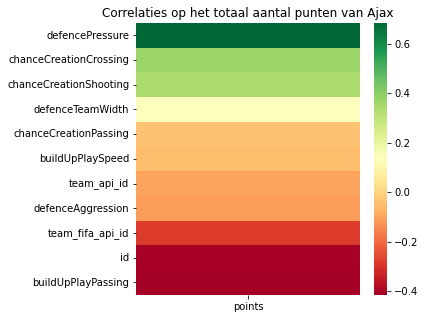

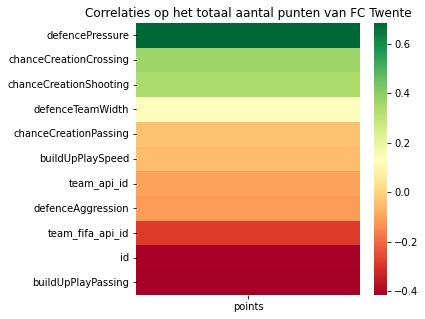

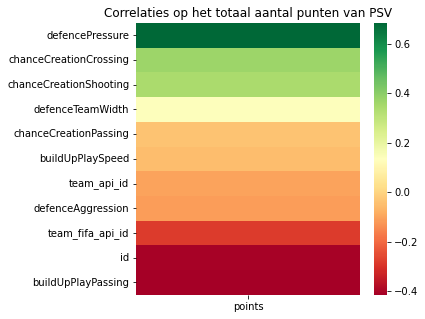

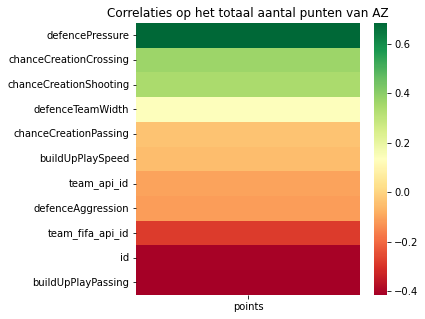

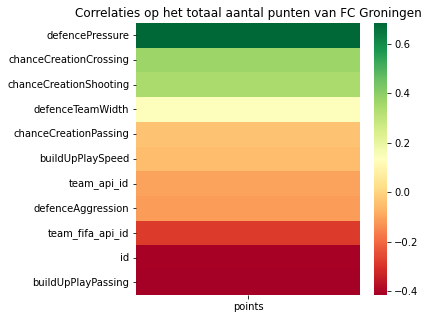

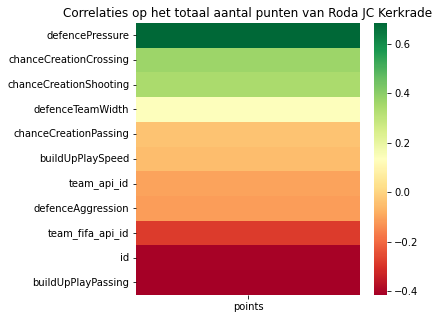

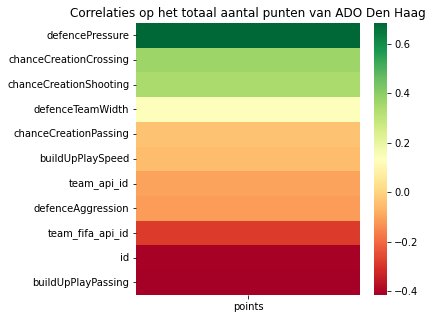

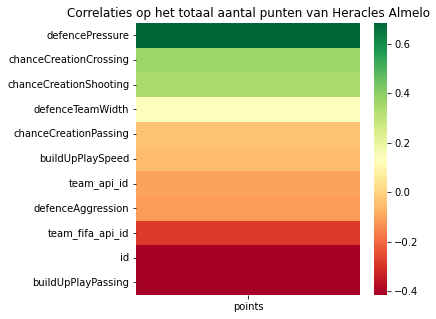

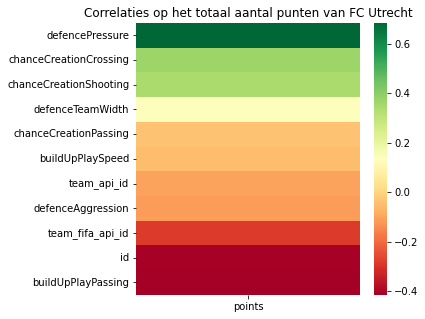

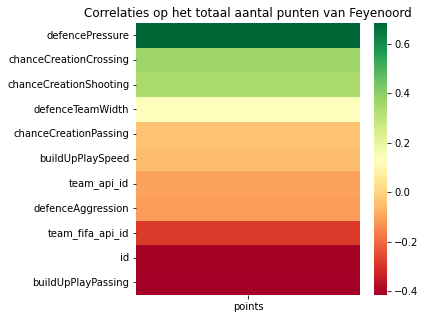

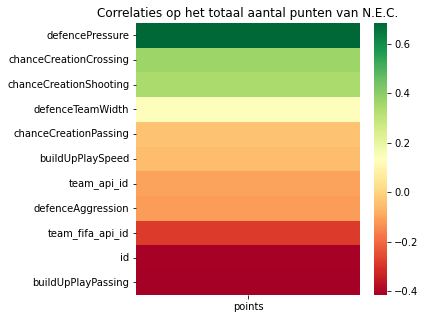

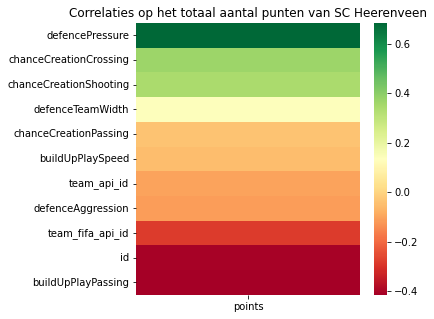

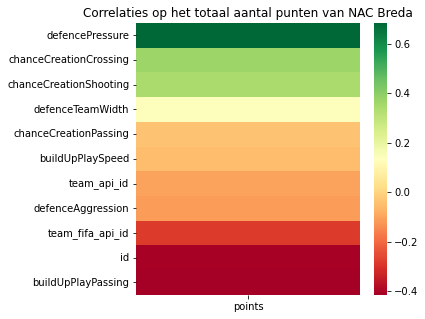

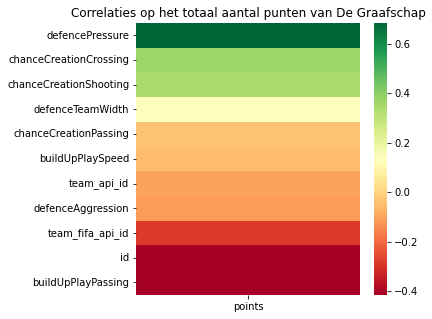

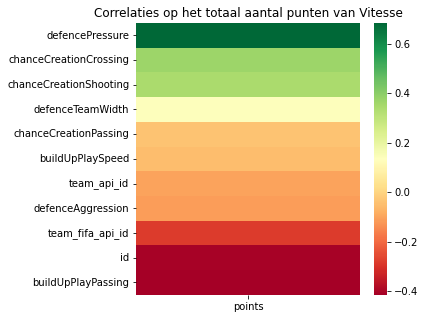

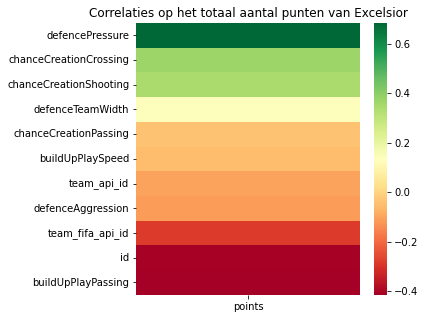

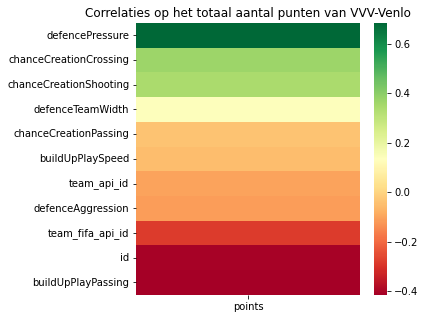

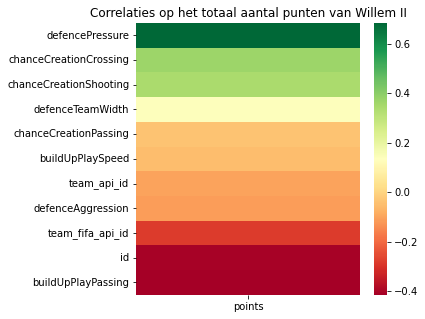

In [15]:
for team in total_df['team_name'].unique():

    df_corr = total_df.corr() 
    points_corr = df_corr["points"] 
    df_points_corr = pd.DataFrame(points_corr, columns=['points']) 
    df_heatmap = df_points_corr.drop(index='points')

    pd.set_option("expand_frame_repr", False)
    df_heatmap.dropna(inplace=True)
    plt.figure(figsize=(5,5))

    s = sns.heatmap(df_heatmap.sort_values(by=['points'], ascending=False), cmap='RdYlGn') 
    plt.title(f"Correlaties op het totaal aantal punten van {team}") 
    plt.show() 

### Visueel maken bevindingen.   <a name="visualisatie"></a>

Om een beter inzicht te krijgen in hoe de sterkste en zwakste variabelen zich verhouden worden hieronder twee scatterplots aan gemaakt, hier kunnen wij zien dat de variabele "defencePressure" zich positief verhoudt ten opzichte van het behaalde aantal punten en "buildupPlayPassing" zich negatief verhoudt.

<function matplotlib.pyplot.show(close=None, block=None)>

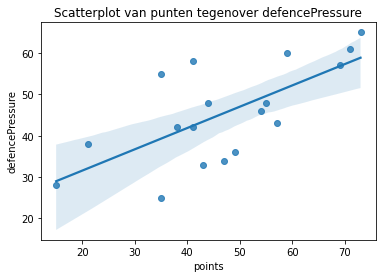

In [16]:
sns.regplot(data=total_df, x="points", y="defencePressure")
plt.title("Scatterplot van punten tegenover defencePressure") 
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

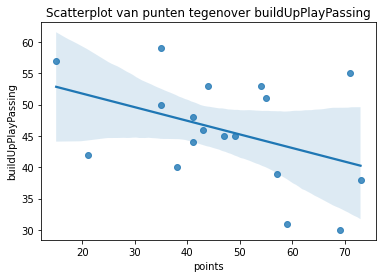

In [17]:
sns.regplot(data=total_df, x="points", y="buildUpPlayPassing")
plt.title("Scatterplot van punten tegenover buildUpPlayPassing") 
plt.show

[Terug naar het begin](#jump)

# Sprint 4    <a name="sprint4"></a>

## 1. Numerieke gemiddelde spelers. <a name="gemiddeldspeler"></a>
Maak op basis van het dataframe met de spelersattributen een nieuw dataframe waarin voor iedere speler slechts één rij is met daarin het gemiddelde van alle numerieke ratings.

to do: merge tussen deze 2 en dan group by op player name/player id

In [18]:
df_p_pa = df_player.merge(df_player_attributes, on=['player_api_id', 'player_fifa_api_id'])
df_p_pa_avg = df_p_pa.groupby('player_name').mean().reset_index()
display(df_p_pa_avg)

,player_name,id_x,player_api_id,player_fifa_api_id,height,weight,id_y,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,Aaron Appindangoye,1.0,505942.0,218353.0,182.88,187.0,3.0,63.600000,67.600000,48.600000,43.600000,70.600000,60.600000,43.600000,50.600000,44.600000,38.600000,63.600000,48.600000,60.000000,64.000000,59.000000,46.600000,65.000000,54.600000,58.000000,54.000000,76.000000,34.600000,65.800000,52.200000,44.600000,53.600000,47.600000,63.800000,66.000000,67.800000,5.600000,10.600000,9.600000,7.600000,7.600000
1,Aaron Cresswell,2.0,155782.0,189615.0,170.18,146.0,22.0,66.969697,74.484848,70.787879,49.454545,52.939394,62.272727,29.151515,61.090909,61.878788,62.121212,63.242424,61.787879,76.000000,74.939394,75.242424,67.848485,84.727273,65.909091,75.303030,72.878788,51.757576,54.121212,65.060606,57.878788,51.484848,57.454545,53.121212,69.393939,68.787879,71.515152,12.181818,8.666667,14.242424,10.363636,12.909091
2,Aaron Doran,3.0,162549.0,186170.0,170.18,163.0,51.5,67.000000,74.192308,68.115385,57.923077,58.692308,65.115385,54.269231,69.038462,60.192308,55.615385,60.461538,68.615385,75.538462,77.500000,77.615385,50.346154,80.730769,62.807692,67.307692,70.923077,70.076923,58.038462,59.115385,47.269231,61.807692,69.384615,60.538462,22.038462,21.115385,21.346154,14.038462,11.807692,17.730769,10.115385,13.500000
3,Aaron Galindo,4.0,30572.0,140161.0,182.88,198.0,76.0,69.086957,70.782609,57.217391,26.260870,69.260870,64.695652,47.782609,55.565217,37.782609,40.391304,60.826087,63.173913,50.217391,52.826087,62.826087,58.217391,44.086957,64.869565,70.782609,55.434783,78.695652,31.304348,69.304348,61.565217,35.913043,53.782609,41.739130,70.608696,70.652174,68.043478,14.173913,11.173913,22.869565,11.173913,10.173913
4,Aaron Hughes,5.0,23780.0,17725.0,182.88,154.0,100.0,73.240000,74.680000,45.080000,38.840000,73.040000,64.760000,32.080000,50.600000,45.480000,26.360000,56.840000,60.160000,51.120000,54.080000,50.760000,69.400000,64.160000,47.080000,77.840000,66.480000,73.800000,24.280000,69.680000,76.840000,40.080000,46.480000,52.960000,77.600000,76.040000,74.600000,8.280000,8.320000,24.920000,12.840000,11.920000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10843,Zsolt Low,11073.0,36491.0,111191.0,180.34,154.0,183957.0,67.571429,72.857143,63.142857,44.571429,59.857143,66.857143,57.000000,66.857143,60.000000,52.571429,58.285714,68.142857,71.000000,72.142857,59.000000,69.142857,72.000000,60.714286,42.000000,70.000000,66.571429,56.714286,71.000000,68.285714,61.571429,66.000000,61.000000,61.000000,64.285714,59.000000,7.142857,18.714286,42.428571,16.714286,16.714286
10844,Zurab Khizanishvili,11074.0,35506.0,47058.0,185.42,172.0,183964.5,70.750000,78.125000,46.750000,43.000000,79.000000,58.875000,59.000000,36.000000,29.000000,41.375000,50.625000,62.000000,65.000000,61.500000,56.000000,62.750000,53.000000,50.000000,68.000000,70.500000,68.000000,46.000000,71.000000,72.250000,56.500000,63.000000,64.000000,70.750000,73.250000,65.000000,14.000000,18.500000,41.625000,19.000000,20.000000
10845,Zvjezdan Misimovic,11075.0,39902.0,102359.0,180.34,176.0,183973.5,80.000000,81.700000,78.200000,72.600000,57.400000,85.500000,77.000000,83.000000,86.000000,74.200000,79.000000,85.200000,62.500000,65.700000,78.200000,75.600000,72.100000,75.800000,58.000000,63.000000,64.100000,79.000000,57.500000,49.200000,76.200000,87.100000,70.900000,26.200000,31.200000,30.000000,9.000000,15.400000,42.100000,16.200000,12.000000
10846,de Oliveira Cleber Monteiro,2483.0,11833.0,163001.0,182.88,170.0,41622.0,66.1

## 2. Toevoegen overall rating in dataframe match. <a name="overallrating"></a>
Voeg voor iedere regel in het dataframe match de overall rating toe van iedere speler. Hint: gebruik hierbij list comprehensions en een zelf-gedefinieerde functie.

to do: laatste 30 kollommen weg halen, xy weg, drop rows missende waardes spelers, mergen met df_player_player-attributes

In [19]:
##making match_fixed:
#x, y en laatste 38 kolommen deleten & delete null values
df_match_fixed = df_match.iloc[:, np.r_[0:11, 55:77]].dropna()
df_match_fixed = df_match_fixed[df_match_fixed['league_id'] == 13274]

display(df_match_fixed)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
13281,13282,13274,13274,2008/2009,1,2008-08-31 00:00:00,508310,10229,9761,1,2,109060.0,26616.0,30879.0,70812.0,38795.0,45481.0,33335.0,26453.0,26797.0,35497.0,41008.0,42829.0,26626.0,5693.0,26635.0,39388.0,26631.0,26705.0,36400.0,42707.0,30921.0,25640.0
13296,13297,13274,13274,2008/2009,11,2008-11-16 00:00:00,523745,8593,8640,4,1,26002.0,109651.0,37643.0,26005.0,37762.0,118730.0,26535.0,26459.0,23951.0,40636.0,30603.0,36617.0,41165.0,30964.0,34479.0,37194.0,39359.0,5703.0,26440.0,145586.0,26434.0,26451.0
13413,13414,13274,13274,2008/2009,23,2009-02-15 00:00:00,523853,8593,10235,2,0,30841.0,109651.0,40153.0,37643.0,26005.0,35680.0,30603.0,26459.0,26535.0,40636.0,45174.0,34489.0,42703.0,40161.0,41462.0,159854.0,37185.0,26539.0,108038.0,109638.0,36391.0,30592.0
13426,13427,13274,13274,2008/2009,25,2009-02-28 00:00:00,523866,10229,8674,3,0,109060.0,26616.0,30879.0,26660.0,26797.0,41008.0,26450.0,26453.0,41463.0,41280.0,35497.0,36846.0,45461.0,26465.0,30424.0,30824.0,30597.0,45462.0,33625.0,26699.0,39141.0,42534.0
13428,13429,13274,13274,2008/2009,25,2009-02-28 00:00:00,523868,9761,8614,3,1,42829.0,26723.0,26626.0,26635.0,36400.0,39388.0,5693.0,33436.0,27338.0,25640.0,42707.0,101584.0,75411.0,26614.0,26632.0,25835.0,112471.0,26653.0,114558.0,17855.0,106474.0,110115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15714,15715,13274,13274,2015/2016,9,2015-10-17 00:00:00,1983346,9791,8593,0,2,26589.0,147601.0,213167.0,31296.0,26455.0,243439.0,248151.0,213682.0,422128.0,351999.0,518346.0,5710.0,469804.0,304455.0,496563.0,352366.0,467479.0,298448.0,178753.0,39213.0,562267.0,266526.0
15715,15716,13274,13274,2015/2016,9,2015-10-17 00:00:00,1983347,9908,9803,1,1,118848.0,466861.0,121642.0,352392.0,35022.0,462004.0,45879.0,351898.0,614453.0,352968.0,105919.0,243482.0,237534.0,26465.0,45485.0,37188.0,113189.0,467494.0,351875.0,7604.0,198583.0,281206.0
15716,15717,13274,13274,2015/2016,9,2015-10-17 00:00:00,1983348,8640,10218,1,1,150236.0,207642.0,70812.0,184821.0,389845.0,178765.0,467495.0,31045.0,158581.0,289441.0,441883.0,149260.0,278284.0,113270.0,279104.0,467480.0,26499.0,45816.0,178767.0,352358.0,160906.0,277609.0
15717,15718,13274,13274,2015/2016,9,2015-10-18 00:00:00,1983349,8611,8464,1,0,588337.0,574234.0,228982.0,450708.0,37789.0,186847.0,360559.0,188533.0,371538.0,467521.0,36133.0,141126.0,410015.0,41162.0,238529.0,466832.0,561849.0,179115.0,240790.0,230133.0,288349.0,215419.0


In [20]:
##made some code that actually worked if we ignore the fact we need to do it for each date. (cuz f that)
#nu on gemiddelde van df_p_pa_avg

#definition to get the wanted rating for the given player (using df_p_pa_avg voor gemiddelde)

def get_player_rating(player, rating):
    """
    
    """
    
    player_rating = df_p_pa_avg.loc[df_p_pa_avg['player_api_id'] == player, f'{rating}']
    return player_rating.values[0] if not player_rating.empty else np.nan
#(.values[0] is to pick the first value in the list that comes out.. otherwise u get all ratings for each date from the player.. could maybe do something with that? idk)

#small test:
display(round(get_player_rating(109060.0, 'overall_rating'), 2))

#u can use round in the function to round it off. but this is gemiddelde.

74.73

In [22]:
def player_rating(rating):
    
    """
    
    
    
    """
    #list of column names
    home_players = ['home_player_' + str(x) for x in range(1,12)]
    away_players = ['away_player_' + str(x) for x in range(1,12)]
    players = home_players + away_players
    
    ## applying it to df_match_fixed:
    # Subset the df_match_fixed dataframe to only include the player columns
    df_players = df_match_fixed[players]

    # Use applymap to apply the function to each element in the df_players dataframe
    #(i used round in the lambda cuz it looks good)
    df_player_ratings = df_players.applymap(lambda x: get_player_rating(x, f'{rating}'))
    df_player_ratings = df_player_ratings.add_prefix(f'{rating}_')

    # Merge the df_player_ratings dataframe with the original df_match_fixed dataframe
    df = pd.concat([df_match_fixed, df_player_ratings], axis=1)
    
    return df

df_match_with_ratings = player_rating('overall_rating')
display(df_match_with_ratings)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,overall_rating_home_player_1,overall_rating_home_player_2,overall_rating_home_player_3,overall_rating_home_player_4,overall_rating_home_player_5,overall_rating_home_player_6,overall_rating_home_player_7,overall_rating_home_player_8,overall_rating_home_player_9,overall_rating_home_player_10,overall_rating_home_player_11,overall_rating_away_player_1,overall_rating_away_player_2,overall_rating_away_player_3,overall_rating_away_player_4,overall_rating_away_player_5,overall_rating_away_player_6,overall_rating_away_player_7,overall_rating_away_player_8,overall_rating_away_player_9,overall_rating_away_player_10,overall_rating_away_player_11
13281,13282,13274,13274,2008/2009,1,2008-08-31 00:00:00,508310,10229,9761,1,2,109060.0,26616.0,30879.0,70812.0,38795.0,45481.0,33335.0,26453.0,26797.0,35497.0,41008.0,42829.0,26626.0,5693.0,26635.0,39388.0,26631.0,26705.0,36400.0,42707.0,30921.0,25640.0,74.727273,64.681818,67.409091,75.368421,71.565217,65.565217,NaN,74.888889,68.703704,75.550000,NaN,68.473684,72.285714,66.733333,71.384615,68.125000,70.333333,63.750000,68.269231,69.142857,69.625000,68.545455
13296,13297,13274,13274,2008/2009,11,2008-11-16 00:00:00,523745,8593,8640,4,1,26002.0,109651.0,37643.0,26005.0,37762.0,118730.0,26535.0,26459.0,23951.0,40636.0,30603.0,36617.0,41165.0,30964.0,34479.0,37194.0,39359.0,5703.0,26440.0,145586.0,26434.0,26451.0,75.482759,73.142857,76.166667,79.606061,78.925926,71.333333,70.769231,68.272727,68.833333,85.275000,75.550000,75.173913,69.120000,74.611111,72.500000,71.652174,71.062500,71.066667,74.571429,65.636364,77.928571,71.266667
13413,13414,13274,13274,2008/2009,23,2009-02-15 00:00:00,523853,8593,10235,2,0,30841.0,109651.0,40153.0,37643.0,26005.0,35680.0,30603.0,26459.0,26535.0,40636.0,45174.0,34489.0,42703.0,40161.0,41462.0,159854.0,37185.0,26539.0,108038.0,109638.0,36391.0,30592.0,78.629630,73.142857,68.315789,76.166667,79.606061,64.750000,75.550000,68.272727,70.769231,85.275000,73.500000,71.500000,68.789474,67.666667,70.400000,67.904762,65.400000,73.120000,73.600000,74.685714,68.285714,78.333333
13426,13427,13274,13274,2008/2009,25,2009-02-28 00:00:00,523866,10229,8674,3,0,109060.0,26616.0,30879.0,26660.0,26797.0,41008.0,26450.0,26453.0,41463.0,41280.0,35497.0,36846.0,45461.0,26465.0,30424.0,30824.0,30597.0,45462.0,33625.0,26699.0,39141.0,42534.0,74.727273,64.681818,67.409091,70.800000,68.703704,NaN,72.000000,74.888889,73.590909,74.971429,75.550000,NaN,65.611111,69.272727,75.590909,68.903226,70.000000,69.272727,68.777778,67.222222,74.000000,67.545455
13428,13429,13274,13274,2008/2009,25,2009-02-28 00:00:00,523868,9761,8614,3,1,42829.0,26723.0,26626.0,26635.0,36400.0,39388.0,5693.0,33436.0,27338.0,25640.0,42707.0,101584.0,75411.0,26614.0,26632.0,25835.0,112471.0,26653.0,114558.0,17855.0,106474.0,110115.0,68.473684,64.000000,72.285714,71.384615,68.269231,68.125000,66.733333,68.400000,68.166667,68.545455,69.142857,NaN,68.750000,67.400000,64.000000,62.750000,67.392857,62.571429,77.500000,67.823529,67.391304,68.379310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15714,15715,13274,13274,2015/2016,9,2015-10-17 00:00:00,1983346,9791,8593,0,2,26589.0,147601.0,213167.0,31296.0,26455.0,243439.0,248151.0,213682.0,422128.0,351999.0,518346.0,5710.0,469804.0,304455.0,496563.0,352366.0,467479.0,298448.0,178753.0,39213.0,562267.0,266526.0,65.666667,65.875000,64.176471,67.789474,66.695652,65.500000,63.687500,69.428571

## 3. Visualisatie overall rating speler van een seizoen.  <a name="visueeloverallseizoen"></a>
Maak voor één seizoen een visualisatie waarin je de gemiddelde overall rating van alle spelers over alle wedstrijden per team laat zien.

In [23]:
#proper table 
def team_rating(rating):
    
    """
    
    
    
    """
    
    #creating dataframe with player ratings
    df = player_rating(f'{rating}')
    
    #column lists for home and away teams
    home = [f'{rating}_home_player_' + str(x) for x in range(1,12)]
    away = [f'{rating}_away_player_' + str(x) for x in range(1,12)]

    #Average of eacht team per match
    rating_home_team = df[home].mean(axis=1)
    rating_away_team = df[away].mean(axis=1)

    #adding the average to the df
    df['rating_home_team'] = rating_home_team
    df['rating_away_team'] = rating_away_team

    #columns of home and away
    df_home_team = df[['home_team_api_id', 'season', 'rating_home_team']]
    df_away_team = df[['away_team_api_id', 'season', 'rating_away_team']]

    #grouping them for each team.
    df_home_team = df_home_team.groupby(['season', 'home_team_api_id']).mean()
    df_away_team = df_away_team.groupby(['season', 'away_team_api_id']).mean()

    #making df for rating for each team
    df_rating_teams = pd.concat([df_home_team, df_away_team], axis = 1).mean(axis=1)
    df_rating_teams = pd.DataFrame(df_rating_teams).reset_index()
    df_rating_teams.columns = ['season', 'team_api_id', f'{rating}']
    
    #joining team_api_id of overall_rating_teamcode and team_long_name of df_team & givin columns proper names
    overall_rating_teamname = pd.merge(df_rating_teams, df_team[['team_api_id', 'team_long_name']], on = 'team_api_id' , how = 'left')

    return overall_rating_teamname

#showing overall rating per team per season
overall_rating_team = team_rating('overall_rating')
display(overall_rating_team)

,season,team_api_id,overall_rating,team_long_name
0,2008/2009,8464,67.231129,N.E.C.
1,2008/2009,8525,64.651356,Willem II
2,2008/2009,8593,74.430367,Ajax
3,2008/2009,8611,72.826835,FC Twente
4,2008/2009,8614,65.655829,Sparta Rotterdam
5,2008/2009,8640,73.469310,PSV
6,2008/2009,8674,68.939606,FC Groningen
7,2008/2009,9761,68.200900,NAC Breda
8,2008/2009,9791,66.601795,Heracles Almelo
9,2008/2009,9803,67.369620,Roda JC Kerkrade


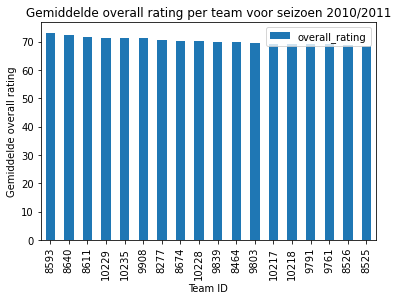

In [24]:
#jesse's code
thuis_speler_col = ['home_player_' + str(x) for x in range(1,12)] + ['away_player_' + str(x) for x in range(1,12)]
df_seizoen = df_match_fixed[df_match_fixed['season'] == '2010/2011']

 

df_team_ratings = pd.DataFrame()
for col in thuis_speler_col:
    df_merged = df_seizoen.merge(df_p_pa[['player_api_id', 'overall_rating']], left_on=col, right_on='player_api_id')
    df_team_ratings = df_team_ratings.append(df_merged)
    
df_team_ratings = df_team_ratings[['home_team_api_id'
                                   , 'overall_rating']].groupby('home_team_api_id').mean().sort_values('overall_rating', ascending=False)

 


df_team_ratings.plot(kind='bar', title='Gemiddelde overall rating per team voor seizoen 2010/2011')
plt.xlabel('Team ID')
plt.ylabel('Gemiddelde overall rating')
plt.show()

## 4. Visualisatie punten per wedstrijd per team. <a name="visueelpuntenwedstrijd"></a>
Maak voor hetzelfde seizoen een visualisatie waarin je het gemiddelde aantal punten per wedstrijd van ieder team laat zien.

In [25]:
# per gespeelde wedstrijd van seizoen 2010/2011 het aantal punten tonen
punten_home_team = pd.read_sql("""
        SELECT t.team_long_name as team_name, 
            m.home_team_api_id AS home_id, 
            m.date as date,

                SUM(CASE WHEN m.home_team_goal > m.away_team_goal THEN 3
                    WHEN m.home_team_goal = m.away_team_goal THEN 1
                        ELSE 0 END) AS home_points            
            
            FROM Match AS m 
        
                INNER JOIN team AS t 
                    ON t.team_api_id = m.home_team_api_id
                        WHERE m.season = '2010/2011' AND team_name = 'SC Heerenveen' 
        
                GROUP BY m.home_team_api_id, m.away_team_api_id;

""", con)

punten_home_team

,team_name,home_id,date,home_points
0,SC Heerenveen,10228,2010-09-11 00:00:00,3
1,SC Heerenveen,10228,2011-02-05 00:00:00,1
2,SC Heerenveen,10228,2010-11-21 00:00:00,3
3,SC Heerenveen,10228,2010-12-18 00:00:00,3
4,SC Heerenveen,10228,2011-05-01 00:00:00,0
5,SC Heerenveen,10228,2010-12-12 00:00:00,3
6,SC Heerenveen,10228,2010-08-07 00:00:00,0
7,SC Heerenveen,10228,2011-01-30 00:00:00,0
8,SC Heerenveen,10228,2010-08-21 00:00:00,3
9,SC Heerenveen,10228,2010-11-06 00:00:00,3


In [26]:
# Punten (allen voor gekozen voetbalteam) wat ze hebben gescoord tijden away wedstrijden 
punten_away_team = pd.read_sql("""
        SELECT t.team_long_name AS team_name, 
            m.away_team_api_id AS away_id, 
            m.date AS date,

            SUM(CASE WHEN m.away_team_goal > m.home_team_goal THEN 3
                WHEN m.away_team_goal = m.home_team_goal THEN 1
                    ELSE 0 END) AS away_points            

            FROM Match AS m 

                INNER JOIN team AS t 
                    ON t.team_api_id = m.away_team_api_id
                        WHERE m.season = '2010/2011' AND team_name = 'SC Heerenveen' 

                GROUP BY m.home_team_api_id, m.away_team_api_id;

""", con)

punten_away_team


,team_name,away_id,date,away_points
0,SC Heerenveen,10228,2011-03-12 00:00:00,1
1,SC Heerenveen,10228,2010-08-28 00:00:00,1
2,SC Heerenveen,10228,2011-02-26 00:00:00,0
3,SC Heerenveen,10228,2010-09-17 00:00:00,0
4,SC Heerenveen,10228,2010-10-27 00:00:00,0
5,SC Heerenveen,10228,2010-08-14 00:00:00,1
6,SC Heerenveen,10228,2011-04-10 00:00:00,1
7,SC Heerenveen,10228,2010-10-17 00:00:00,0
8,SC Heerenveen,10228,2011-02-13 00:00:00,3
9,SC Heerenveen,10228,2011-03-19 00:00:00,0


In [27]:
# het totaal aantal punten van alle teams
# voor seizoen 2010/2011 
# zowel als home en away wedstrijden 
total_points2 = pd.read_sql("""
        SELECT team_name, SUM(points) as total_points
        FROM (
            SELECT t.team_long_name as team_name, 
                m.home_team_api_id AS home_id, 

                SUM(CASE WHEN m.home_team_goal > m.away_team_goal THEN 3
                    WHEN m.home_team_goal = m.away_team_goal THEN 1
                    ELSE 0 END) AS points

            FROM Match AS m 

                INNER JOIN team AS t 
                    ON t.team_api_id = m.home_team_api_id
                        WHERE m.season = '2010/2011' AND team_name = 'SC Heerenveen' 

                GROUP BY m.home_team_api_id, m.away_team_api_id

            UNION ALL

            SELECT t.team_long_name as team_name, 
                m.away_team_api_id AS away_id, 

                SUM(CASE WHEN m.away_team_goal > m.home_team_goal THEN 3
                    WHEN m.away_team_goal = m.home_team_goal THEN 1
                    ELSE 0 END) AS points

            FROM Match AS m 

                INNER JOIN team AS t 
                    ON t.team_api_id = m.away_team_api_id
                        WHERE m.season = '2010/2011'

                GROUP BY m.home_team_api_id, m.away_team_api_id
        ) AS subquery

        GROUP BY team_name
        ORDER BY total_points DESC;
""", con)

total_points2

# ook gesorteerd van hoog naar laag
# sc heerenveen is lowkey wel goed

,team_name,total_points
0,Rangers,49
1,FC Barcelona,46
2,Celtic,44
3,Real Madrid CF,43
4,SC Heerenveen,41
5,FC Porto,41
6,Milan,39
7,Valencia CF,36
8,Bayer 04 Leverkusen,36
9,Borussia Dortmund,35


In [28]:
# in een functie gezet zodat ik er een visualisatie van kon maken 
def total_points_by_team(season, team_name):
    con = sqlite3.connect('database.sqlite')
    query = f"""
        SELECT team_name, SUM(points) as total_points
        FROM (
            SELECT t.team_long_name as team_name, 
                m.home_team_api_id AS home_id, 

                SUM(CASE WHEN m.home_team_goal > m.away_team_goal THEN 3
                    WHEN m.home_team_goal = m.away_team_goal THEN 1
                    ELSE 0 END) AS points

            FROM Match AS m 

                INNER JOIN team AS t 
                    ON t.team_api_id = m.home_team_api_id
                        WHERE m.season = '{season}' AND team_name = '{team_name}' 

                GROUP BY m.home_team_api_id, m.away_team_api_id

            UNION ALL

            SELECT t.team_long_name as team_name, 
                m.away_team_api_id AS away_id, 

                SUM(CASE WHEN m.away_team_goal > m.home_team_goal THEN 3
                    WHEN m.away_team_goal = m.home_team_goal THEN 1
                    ELSE 0 END) AS points

            FROM Match AS m 

                INNER JOIN team AS t 
                    ON t.team_api_id = m.away_team_api_id
                        WHERE m.season = '{season}'

                GROUP BY m.home_team_api_id, m.away_team_api_id
        ) AS subquery

        GROUP BY team_name
        ORDER BY total_points DESC;
    """
    total_points = pd.read_sql(query, con)
    con.close()
    return total_points

Even koekeloeren 
total_points = total_points_by_team('2010/2011', 'SC Heerenveen')
print(total_points)

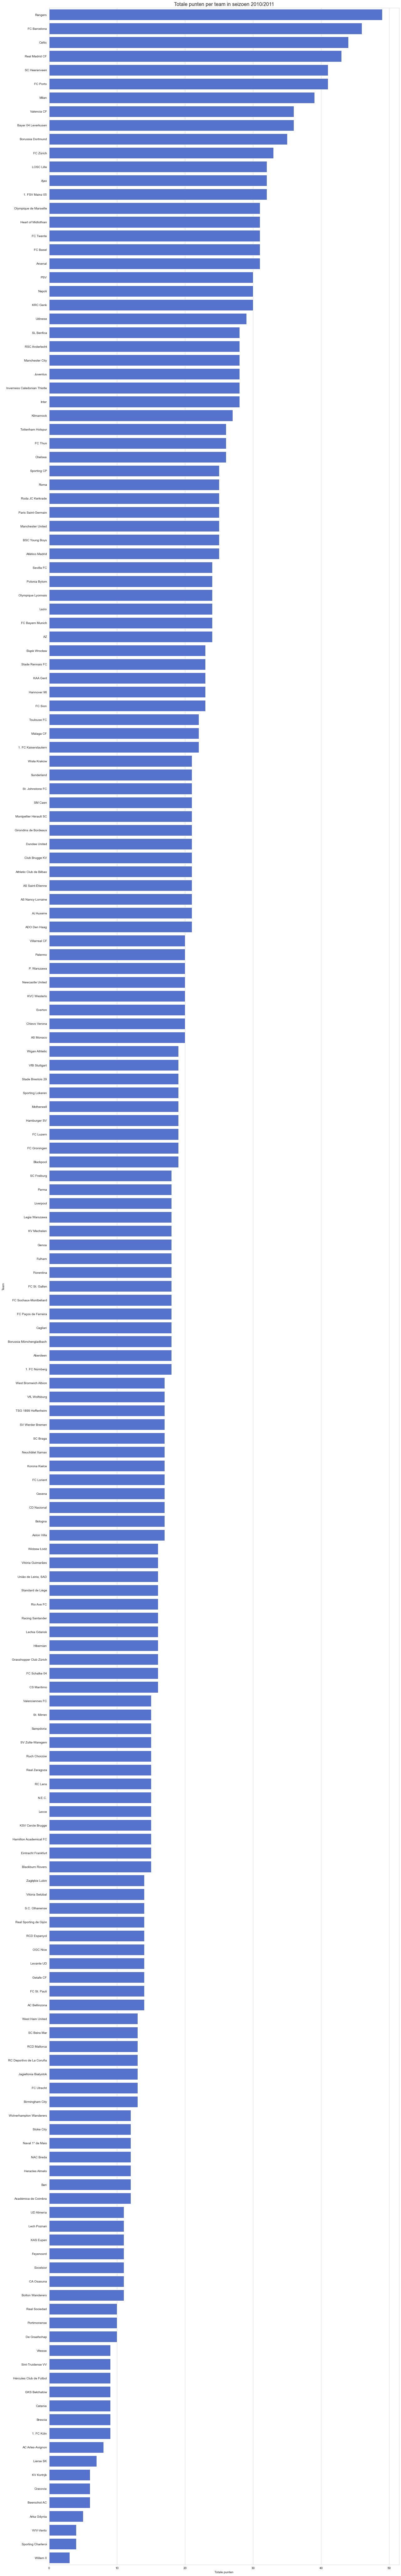

In [29]:
# de visualisatie van alle teams, voor seizoen 2010/2011 
total_points = total_points_by_team('2010/2011', 'SC Heerenveen')

sns.set_style('whitegrid')
plt.figure(figsize=(20, 150))
sns.barplot(data=total_points, y='team_name', x='total_points', color='royalblue')
plt.title('Totale punten per team in seizoen 2010/2011', fontsize=16)
plt.xlabel('Totale punten', fontsize=10)
plt.ylabel('Team', fontsize=10)
plt.show()

## 5. Visualisatie vergelijking overall rating & punten per team. <a name="overallratingpuntenteam"></a>
Toon een visualisatie waarin je de gemiddelde overall ratings per team vergelijkt met het gemiddelde aantal punten per team.

In [30]:
# functie om de gemiddelde overall ratings per team op te halen
def avg_rating_by_team(season):
    con = sqlite3.connect('database.sqlite')
    query = ("""
        SELECT t.team_long_name AS team_name, AVG(pa.overall_rating) AS avg_rating
        FROM Player_Attributes AS pa
            INNER JOIN (
                SELECT team_api_id, team_long_name
                FROM Team
            ) AS t
                ON pa.team_api_id = t.team_api_id
        WHERE pa.date BETWEEN '{season}-07-01' AND '{season}-06-30'
        GROUP BY team_name
        ORDER BY avg_rating DESC;
    """, con)
    avg_ratings = pd.read_sql(query, con)
    con.close()
    return avg_ratings

In [31]:
season = '2010/2011'
avg_rating = avg_rating_by_team(season)

plt.figure(figsize=(12,6))
plt.bar(avg_rating['team_name'], avg_rating['avg_rating'])
plt.title(f'Gemiddelde overall ratings per team - {season}')
plt.xlabel('Team')
plt.xticks(rotation=90)
plt.ylabel('Gemiddelde overall rating')
plt.show()

DatabaseError: Execution failed on sql '("\n        SELECT t.team_long_name AS team_name, AVG(pa.overall_rating) AS avg_rating\n        FROM Player_Attributes AS pa\n            INNER JOIN (\n                SELECT team_api_id, team_long_name\n                FROM Team\n            ) AS t\n                ON pa.team_api_id = t.team_api_id\n        WHERE pa.date BETWEEN '{season}-07-01' AND '{season}-06-30'\n        GROUP BY team_name\n        ORDER BY avg_rating DESC;\n    ", <sqlite3.Connection object at 0x0000025CA81BCD50>)': argument 1 must be str, not tuple

## 6. Toepassen functie op andere rating. <a name="definitieandererating"></a>
Herhaal stappen 3 tot en met 5 voor een andere ‘rating’. Hint: het gebruik van functies maakt het herhalen van handelingen veel eenvoudiger.

[Terug naar het begin](#jump)

# Sprint 5 <a name= "sprint5"></a>
In deze sprint ga je aan de hand van spelers- en/ of teameigenschappen voorspellen wat het resultaat per wedstrijd wordt. Er zijn drie mogelijkheden:

‘win’: het thuisteam wint

‘defeat’: het uitteam wint

‘draw’: de teams spelen gelijk

## 1. Welke vorm supervised learning? <a name= "vorm"></a>
Benoem op basis van het bovenstaande met welke vorm van supervised learning we hier te maken hebben.

In supervised learning hebben we input data (features) en de bijbehorende output data (target variables). De input data is hier de speler eigenschappen, en de output data het wedstrijdresultaat in de vorm van een 'win', een 'defeat', of een 'draw'.

In dit geval hebben we het over classification. Dit is een type supervised learning waarbij het doel is om input data in vooraf bepaalde classen, of labels te stoppen. Hierbij zijn 'win', 'defeat', en 'draw' dus de labels.

## 2. Resultaat toevoegen aan Match <a name= "resultaat"> </a>
Voeg het resultaat van iedere wedstrijd toe aan het match dataframe.

In [32]:
display(df_match_fixed)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
13281,13282,13274,13274,2008/2009,1,2008-08-31 00:00:00,508310,10229,9761,1,2,109060.0,26616.0,30879.0,70812.0,38795.0,45481.0,33335.0,26453.0,26797.0,35497.0,41008.0,42829.0,26626.0,5693.0,26635.0,39388.0,26631.0,26705.0,36400.0,42707.0,30921.0,25640.0
13296,13297,13274,13274,2008/2009,11,2008-11-16 00:00:00,523745,8593,8640,4,1,26002.0,109651.0,37643.0,26005.0,37762.0,118730.0,26535.0,26459.0,23951.0,40636.0,30603.0,36617.0,41165.0,30964.0,34479.0,37194.0,39359.0,5703.0,26440.0,145586.0,26434.0,26451.0
13413,13414,13274,13274,2008/2009,23,2009-02-15 00:00:00,523853,8593,10235,2,0,30841.0,109651.0,40153.0,37643.0,26005.0,35680.0,30603.0,26459.0,26535.0,40636.0,45174.0,34489.0,42703.0,40161.0,41462.0,159854.0,37185.0,26539.0,108038.0,109638.0,36391.0,30592.0
13426,13427,13274,13274,2008/2009,25,2009-02-28 00:00:00,523866,10229,8674,3,0,109060.0,26616.0,30879.0,26660.0,26797.0,41008.0,26450.0,26453.0,41463.0,41280.0,35497.0,36846.0,45461.0,26465.0,30424.0,30824.0,30597.0,45462.0,33625.0,26699.0,39141.0,42534.0
13428,13429,13274,13274,2008/2009,25,2009-02-28 00:00:00,523868,9761,8614,3,1,42829.0,26723.0,26626.0,26635.0,36400.0,39388.0,5693.0,33436.0,27338.0,25640.0,42707.0,101584.0,75411.0,26614.0,26632.0,25835.0,112471.0,26653.0,114558.0,17855.0,106474.0,110115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15714,15715,13274,13274,2015/2016,9,2015-10-17 00:00:00,1983346,9791,8593,0,2,26589.0,147601.0,213167.0,31296.0,26455.0,243439.0,248151.0,213682.0,422128.0,351999.0,518346.0,5710.0,469804.0,304455.0,496563.0,352366.0,467479.0,298448.0,178753.0,39213.0,562267.0,266526.0
15715,15716,13274,13274,2015/2016,9,2015-10-17 00:00:00,1983347,9908,9803,1,1,118848.0,466861.0,121642.0,352392.0,35022.0,462004.0,45879.0,351898.0,614453.0,352968.0,105919.0,243482.0,237534.0,26465.0,45485.0,37188.0,113189.0,467494.0,351875.0,7604.0,198583.0,281206.0
15716,15717,13274,13274,2015/2016,9,2015-10-17 00:00:00,1983348,8640,10218,1,1,150236.0,207642.0,70812.0,184821.0,389845.0,178765.0,467495.0,31045.0,158581.0,289441.0,441883.0,149260.0,278284.0,113270.0,279104.0,467480.0,26499.0,45816.0,178767.0,352358.0,160906.0,277609.0
15717,15718,13274,13274,2015/2016,9,2015-10-18 00:00:00,1983349,8611,8464,1,0,588337.0,574234.0,228982.0,450708.0,37789.0,186847.0,360559.0,188533.0,371538.0,467521.0,36133.0,141126.0,410015.0,41162.0,238529.0,466832.0,561849.0,179115.0,240790.0,230133.0,288349.0,215419.0


In [33]:
#if home team goal>away team goal win, if home team goal = away_team_goal draw, else defeat.
df_result = []
df_result_numbers = []

for index,row in df_match_fixed.iterrows():
    if row['home_team_goal'] > row['away_team_goal']:
            df_result.append('win')
            df_result_numbers.append(2)
    elif row['home_team_goal'] == row['away_team_goal']:
            df_result.append('draw')
            df_result_numbers.append(1) 
    else:
            df_result.append('defeat')
            df_result_numbers.append(0)

df_match_fixed['match_result'] = df_result
df_match_fixed['home_win'] = df_result_numbers

display(df_match_fixed)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,match_result,home_win
13281,13282,13274,13274,2008/2009,1,2008-08-31 00:00:00,508310,10229,9761,1,2,109060.0,26616.0,30879.0,70812.0,38795.0,45481.0,33335.0,26453.0,26797.0,35497.0,41008.0,42829.0,26626.0,5693.0,26635.0,39388.0,26631.0,26705.0,36400.0,42707.0,30921.0,25640.0,defeat,0
13296,13297,13274,13274,2008/2009,11,2008-11-16 00:00:00,523745,8593,8640,4,1,26002.0,109651.0,37643.0,26005.0,37762.0,118730.0,26535.0,26459.0,23951.0,40636.0,30603.0,36617.0,41165.0,30964.0,34479.0,37194.0,39359.0,5703.0,26440.0,145586.0,26434.0,26451.0,win,2
13413,13414,13274,13274,2008/2009,23,2009-02-15 00:00:00,523853,8593,10235,2,0,30841.0,109651.0,40153.0,37643.0,26005.0,35680.0,30603.0,26459.0,26535.0,40636.0,45174.0,34489.0,42703.0,40161.0,41462.0,159854.0,37185.0,26539.0,108038.0,109638.0,36391.0,30592.0,win,2
13426,13427,13274,13274,2008/2009,25,2009-02-28 00:00:00,523866,10229,8674,3,0,109060.0,26616.0,30879.0,26660.0,26797.0,41008.0,26450.0,26453.0,41463.0,41280.0,35497.0,36846.0,45461.0,26465.0,30424.0,30824.0,30597.0,45462.0,33625.0,26699.0,39141.0,42534.0,win,2
13428,13429,13274,13274,2008/2009,25,2009-02-28 00:00:00,523868,9761,8614,3,1,42829.0,26723.0,26626.0,26635.0,36400.0,39388.0,5693.0,33436.0,27338.0,25640.0,42707.0,101584.0,75411.0,26614.0,26632.0,25835.0,112471.0,26653.0,114558.0,17855.0,106474.0,110115.0,win,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15714,15715,13274,13274,2015/2016,9,2015-10-17 00:00:00,1983346,9791,8593,0,2,26589.0,147601.0,213167.0,31296.0,26455.0,243439.0,248151.0,213682.0,422128.0,351999.0,518346.0,5710.0,469804.0,304455.0,496563.0,352366.0,467479.0,298448.0,178753.0,39213.0,562267.0,266526.0,defeat,0
15715,15716,13274,13274,2015/2016,9,2015-10-17 00:00:00,1983347,9908,9803,1,1,118848.0,466861.0,121642.0,352392.0,35022.0,462004.0,45879.0,351898.0,614453.0,352968.0,105919.0,243482.0,237534.0,26465.0,45485.0,37188.0,113189.0,467494.0,351875.0,7604.0,198583.0,281206.0,draw,1
15716,15717,13274,13274,2015/2016,9,2015-10-17 00:00:00,1983348,8640,10218,1,1,150236.0,207642.0,70812.0,184821.0,389845.0,178765.0,467495.0,31045.0,158581.0,289441.0,441883.0,149260.0,278284.0,113270.0,279104.0,467480.0,26499.0,45816.0,178767.0,352358.0,160906.0,277609.0,draw,1
15717,15718,13274,13274,2015/2016,9,2015-10-18 00:00:00,1983349,8611,8464,1,0,588337.0,574234.0,228982.0,450708.0,37789.0,186847.0,360559.0,188533.0,371538.0,467521.0,36133.0,141126.0,410015.0,41162.0,238529.0,466832.0,561849.0,179115.0,240790.0,230133.0,288349.0,215419.0,win,2


## 3. Features <a name= 'features'></a>
Maak een keuze voor de ‘features’ die je wilt gebruiken om het resultaat te voorspellen. Onderbouw je keuzes.

- buildUpPlaySpeed : Dit beschrijft de snelheid van het spelopbouw van het team. Teams met hogere snelheden kunnen sneller aanvallen, wat kan leiden tot meer doelpunten.

- chanceCreationShooting: Dit geeft aan hoeveel schietkansen een team creëert. Teams die meer schietkansen creëren, hebben waarschijnlijk meer mogelijkheden om te scoren.

- defencePressure: Teams die hoge druk uitoefenen op de tegenstander kunnen de mogelijkheden voor de tegenstander om te scoren verminderen.


## 4. Niewe dataframe op basis van features<a name= 'newdataframe'></a>
Maak op basis hiervan een nieuw dataframe dat alleen de features en het resultaat per wedstrijd bevat.

In [48]:
df_new = pd.merge(df_match_fixed[['home_team_goal', 'away_team_goal', 'home_team_api_id', 'away_team_api_id', 'home_win']], df_team_attributes[['team_api_id', 'buildUpPlaySpeed', 'chanceCreationShooting', 'defencePressure']], left_on='home_team_api_id', right_on='team_api_id', how='left')
df_new = pd.merge(df_new, df_team_attributes[['team_api_id', 'buildUpPlaySpeed', 'chanceCreationShooting', 'defencePressure']], left_on='away_team_api_id', right_on='team_api_id', how='left', suffixes=('_home', '_away'))

display(df_new)

,home_team_goal,away_team_goal,home_team_api_id,away_team_api_id,home_win,team_api_id_home,buildUpPlaySpeed_home,chanceCreationShooting_home,defencePressure_home,team_api_id_away,buildUpPlaySpeed_away,chanceCreationShooting_away,defencePressure_away
0,1,2,10229,9761,0,10229,55,60,30,9761,30,60,30
1,1,2,10229,9761,0,10229,55,60,30,9761,33,60,42
2,1,2,10229,9761,0,10229,55,60,30,9761,40,42,43
3,1,2,10229,9761,0,10229,55,60,30,9761,58,46,43
4,1,2,10229,9761,0,10229,55,60,30,9761,46,42,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55109,1,5,6413,8277,0,6413,45,58,58,8277,33,54,55
55110,1,5,6413,8277,0,6413,45,58,58,8277,37,56,42
55111,1,5,6413,8277,0,6413,45,58,58,8277,37,62,42
55112,1,5,6413,8277,0,6413,45,58,58,8277,53,56,42


## 5. Algoritmes <a name= 'algoritmes'></a>
Gebruik minimaal twee algoritmes om de resultaten van de wedstrijden te voorspellen. Onderbouw je keuzes.

In [35]:
#only having the needed columns in the dataframe:
df_neew = df_new.drop(['home_team_goal', 'away_team_goal', 'home_team_api_id', 'away_team_api_id', 'team_api_id_home', 'team_api_id_away'], axis =1)

In [36]:
from sklearn.model_selection import train_test_split

features = df_neew[['buildUpPlaySpeed_home', 'chanceCreationShooting_home', 'defencePressure_home', 'buildUpPlaySpeed_away', 'chanceCreationShooting_away', 'defencePressure_away']]
target = df_neew['home_win']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [37]:
#Checking if there are any NaN values.
df_neew.isnull().sum()

home_win                       0
buildUpPlaySpeed_home          0
chanceCreationShooting_home    0
defencePressure_home           0
buildUpPlaySpeed_away          0
chanceCreationShooting_away    0
defencePressure_away           0
dtype: int64

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train het model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Maak voorspellingen op de testset
y_pred_lr = lr.predict(X_test)

# Bereken de nauwkeurigheid
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Nauwkeurigheid van Logistieke Regressie: {accuracy_lr}')

Nauwkeurigheid van Logistieke Regressie: 0.48689104599473826


In [39]:
from sklearn.ensemble import RandomForestClassifier

# Train het model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Maak voorspellingen op de testset
y_pred_rf = rf.predict(X_test)

# Bereken de nauwkeurigheid
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Nauwkeurigheid van Random Forest Classificator: {accuracy_rf}')

Nauwkeurigheid van Random Forest Classificator: 0.4549578154767305


## 6. Evaluatie <a name='evaluatie'></a>
Evalueer en verbeter je model op basis van de juiste metrics. Kies het beste model met de beste hyperparameters en onderbouw je keuze.

<b>GridSearchCV</b> is een kruisvalidatie-wrapper die automatisch een grid search uitvoert op een gegeven model en een set hyperparameters.</br> Het verdeelt de gegeven dataset in k-folds (meestal 5 of 10) en voert de training en evaluatie uit op verschillende splitsingen van de dataset.

In [38]:
from sklearn.model_selection import GridSearchCV

<b> param_grid: <i> dict of lijst met woordenboeken </i> </b></br>
Woordenboek met parameternamen ( str) als sleutels en lijsten met parameterinstellingen die als waarden kunnen worden geprobeerd, of een lijst met dergelijke woordenboeken, in welk geval de rasters die door elk woordenboek in de lijst worden overspannen, worden verkend. </br>Dit maakt het mogelijk om elke reeks parameterinstellingen te doorzoeken.

In [39]:
# Definieer de hyperparameters die je wilt verkennen
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

Waarom gebruiken wij 'Random Forest': </br>
1. Het wordt gebruikt voor het voorspellen of het schatten van kansen op gebeurtenissen. </br>
2. Het imputeren van ontbrekende waarden in een dataset. </br>
3. Het detecteren van de belangrijkste invloedsfactoren (predictoren) voor gebeurtenissen in een dataset.

In [40]:
# Initialiseer de GridSearchCV met de Random Forest Classifier
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

# Voer de grid search uit op de trainingsset
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [41]:
# Bekijk de beste hyperparameters en de beste score
print(f'Beste hyperparameters: {grid_search.best_params_}')
print(f'Beste score: {grid_search.best_score_}')

Beste hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Beste score: 0.5259576666608115


In [42]:
# Train het model met betere parameters
rf = RandomForestClassifier(max_depth = 10, min_samples_split = 10, n_estimators = 100)
rf.fit(X_train, y_train)

# Maak voorspellingen op de testset
y_pred_rf = rf.predict(X_test)

# Bereken de nauwkeurigheid opnieuw
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Nauwkeurigheid van Random Forest Classificator: {accuracy_rf}')

Nauwkeurigheid van Random Forest Classificator: 0.5202757869908373


## 7. Etische data regelgeving/legaliteit <a name='ethisch'><a/>
In dit project wordt met persoonsdata gewerkt. Dit vraagt om zorgvuldigheid.

Inventariseer welke data over de spelers worden verzameld.
Geef aan welke wetgeving daarbij van toepassing is en wat dit betekent voor het gebruik van de data.
Bekijk vervolgens welke mogelijke ethische bezwaren kunnen ontstaan bij het gebruik van de data.
Adviseer de directeur van je club over oplossingen waarmee de mogelijke problemen kunnen worden voorkomen.

<b>Persoonlijke gegevens:</b> hier vind je alle 'standaard' gegevenszoals de naam, geboortedatum, nationaliteit, lengte, gewicht en andere fysieke kenmerken van spelers. Deze gegevens worden vaak gebruikt voor identificatie en profielopbouw.

<b>Prestatiegegevens:</b> Dit zijn alle prestaties van spelers tijdens wedstrijden en trainingen meten, zoals doelpunten, assists, passnauwkeurigheid, snelheid, afgelegde afstand enzovoort. Deze gegevens worden gebruikt om de individuele en teamprestaties te analyseren en te evalueren.

<b>Medische gegevens:</b> hier gaat het over de gezondheid en medische geschiedenis van spelers, zoals blessures, allergieën, medicatiegebruik en fysieke conditie. Deze gegevens worden gebruikt voor blessurepreventie, revalidatie en algemene gezondheidszorg van spelers.

<b>Contractuele gegevens:</b> Dit gaat over de overeenkomstenrechten (verplichtingen) van de spelers, zoals salaris, contractduur, transfergeschiedenis, enzovoort. Deze gegevens worden gebruikt voor contractonderhandelingen, salarisadministratie en compliance met regelgeving.



[Terug naar het begin](#jump)

# Sprint 6 <a name= "sprint6"></a>

In [31]:
display(df_match[['B365H', 'B365D', 'B365A']])

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

## 1. Kies een bookmaker en reken de ‘odds’ die deze bookmaker hanteert om naar kansen (‘probabilities’). Wat valt je op? <a name = 'bookmaker'> </a>

df_match = een dataframe waarin de bookmaker odds zijn opgenomen. 
Wij hebben voor bookmaker Bet365 gekozen sinds deze vrij bekend is in de gokwereld. De kolomnamen hierbij zijn 'B365H', 'B365D' en 'B365A' die de odds voor thuiswinst (B365H), gelijkspel (B365D) en uitwinst (B365A) bevatten.

In [42]:
def prob_odds(odds, home_team_api_id, away_team_api_id):
    filtered_odds = odds[
        (df_match['home_team_api_id'] == home_team_api_id) 
        | (df_match['away_team_api_id'] == away_team_api_id)
    ]
    probabilities = 1 / filtered_odds
    return probabilities

home_team_api_id = 10228
away_team_api_id = 10228
bookmaker_odds = df_match[['B365H', 'B365D', 'B365A']]

probabilities = prob_odds(
    bookmaker_odds, home_team_api_id, away_team_api_id
)

display(probabilities)

,B365H,B365D,B365A
13280,0.238095,0.294118,0.555556
13290,0.263158,0.277778,0.523560
13293,0.666667,0.266667,0.181818
13302,0.500000,0.303030,0.294118
13313,0.381679,0.312500,0.400000
...,...,...,...
15681,0.454545,0.277778,0.333333
15685,0.434783,0.294118,0.333333
15694,0.370370,0.277778,0.416667
15703,0.487805,0.277778,0.303030


1. De resulterende kansen worden weergegeven als decimale getallen tussen 0 en 1. Dit geeft de waarschijnlijkheid weer volgens de bookmaker voor elk resultaat (thuisoverwinning, gelijkspel, uitoverwinning). <br><br>

2. De kansen kunnen variëren voor elk resultaat, wat aangeeft hoe de bookmaker de waarschijnlijkheid inschat. Hogere kansen laten een hogere waarschijnlijkheid zien, terwijl lagere kansen een lagere waarschijnlijkheid tonen.

## 2. Gebruik deze kansen om het voorspelde resultaat van deze ‘bookmaker’ te bepalen. <a name = "result"> </a>

In [46]:
def odds_to_probabilities(odds):
    probabilities = 1 / odds
    return probabilities

In [38]:
bookmaker_odds = df_match[['B365H', 'B365D', 'B365A']]
probabilities = odds_to_probabilities(bookmaker_odds)

In [49]:
df_new['voorspelde_resultaat_B365'] = probabilities.idxmax(axis=1).map(
    {'B365H': 'win', 'B365D': 'draw', 'B365A': 'lose'}
)


df_SCH_pred = df_new[(df_new['home_team_api_id'] == 10228) 
                     
                     | (df_new['away_team_api_id'] == 10228)]
display(df_SCH_pred)

,home_team_goal,away_team_goal,home_team_api_id,away_team_api_id,home_win,team_api_id_home,buildUpPlaySpeed_home,chanceCreationShooting_home,defencePressure_home,team_api_id_away,buildUpPlaySpeed_away,chanceCreationShooting_away,defencePressure_away,voorspelde_resultaat_B365
150,2,3,8640,10228,0,8640,30,70,30,10228,35,60,30,win
151,2,3,8640,10228,0,8640,30,70,30,10228,49,52,58,win
152,2,3,8640,10228,0,8640,30,70,30,10228,67,39,45,win
153,2,3,8640,10228,0,8640,30,70,30,10228,47,42,46,lose
154,2,3,8640,10228,0,8640,30,70,30,10228,53,46,46,lose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54051,1,1,10228,6413,1,10228,53,46,46,6413,57,54,58,NaN
54052,1,1,10228,6413,1,10228,53,46,46,6413,45,58,58,NaN
54053,1,1,10228,6413,1,10228,54,44,46,6413,47,54,46,NaN
54054,1,1,10228,6413,1,10228,54,44,46,6413,57,54,58,NaN


## 3. Vergelijk de voorspelde resultaten van deze ‘bookmaker’ met de werkelijke resultaten. In hoeverre is jouw model beter of slechter dan de voorspellingen van de bookmaker? <a name = 'vergelijken'> </a>

De bookmaker voorspelt vrij accuraat hoe de wedstrijd zou kunnen verlopen. Terwijl ons model helaas maar een 52% accuraatheid heeft. Dus in dit geval is ons model slechter dan de voorspellingen van de bookmaker. Zeker ook sinds de bookmaker het in procentuele kans aangeeft en ons model alleen maar het uiteindelijke antwoord weergeeft.

## 4. Beschrijf in hoeverre je jouw model zou willen gebruiken om te gokken? <a name = 'modelgebruik'> </a>

Ons model is maar voor de helft accuraat in het voorspellen van wedstrijden, deze kans is niet goed genoeg om goed mee te kunnen gokken. Dus nee, we zouden ons model totaal niet willen gebruiken om te gokken. Zeker sinds de bookmaker een grotere kans heeft dan ons model.

[Terug naar het begin](#jump)